In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, recall_score, f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [ ]:
df = pd.read_csv("drive/MyDrive/customer_purchase_data.csv")

In [ ]:
df.head()

,Age,Gender,AnnualIncome,NumberOfPurchases,ProductCategory,TimeSpentOnWebsite,LoyaltyProgram,DiscountsAvailed,PurchaseStatus
0,40,1,66120.267939,8,0,30.568601,0,5,1
1,20,1,23579.773583,4,2,38.240097,0,5,0
2,27,1,127821.306432,11,2,31.633212,1,0,1
3,24,1,137798.623120,19,3,46.167059,0,4,1
4,31,1,99300.964220,19,1,19.823592,0,0,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 1500 non-null   int64  
 1   Gender              1500 non-null   int64  
 2   AnnualIncome        1500 non-null   float64
 3   NumberOfPurchases   1500 non-null   int64  
 4   ProductCategory     1500 non-null   int64  
 5   TimeSpentOnWebsite  1500 non-null   float64
 6   LoyaltyProgram      1500 non-null   int64  
 7   DiscountsAvailed    1500 non-null   int64  
 8   PurchaseStatus      1500 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 105.6 KB


In [ ]:
df.isna().sum()

,0
Age,0
Gender,0
AnnualIncome,0
NumberOfPurchases,0
ProductCategory,0
TimeSpentOnWebsite,0
LoyaltyProgram,0
DiscountsAvailed,0
PurchaseStatus,0


In [ ]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Age,1500.0,44.298667,15.537259,18.000000,31.000000,45.000000,57.000000,70.000000
Gender,1500.0,0.504667,0.500145,0.000000,0.000000,1.000000,1.000000,1.000000
AnnualIncome,1500.0,84249.164338,37629.493078,20001.512518,53028.979155,83699.581476,117167.772858,149785.176481
NumberOfPurchases,1500.0,10.420000,5.887391,0.000000,5.000000,11.000000,15.000000,20.000000
ProductCategory,1500.0,2.012667,1.428005,0.000000,1.000000,2.000000,3.000000,4.000000
TimeSpentOnWebsite,1500.0,30.469040,16.984392,1.037023,16.156700,30.939516,44.369863,59.991105
LoyaltyProgram,1500.0,0.326667,0.469151,0.000000,0.000000,0.000000,1.000000,1.000000
DiscountsAvailed,1500.0,2.555333,1.705152,0.000000,1.000000,3.000000,4.000000,5.000000
PurchaseStatus,1500.0,0.432000,0.495520,0.000000,0.000000,0.000000,1.000000,1.000000


In [ ]:
df[df['NumberOfPurchases']==0].shape

(51, 9)

In [ ]:
df['PurchaseStatus'].value_counts()

,count
PurchaseStatus,
0,852
1,648


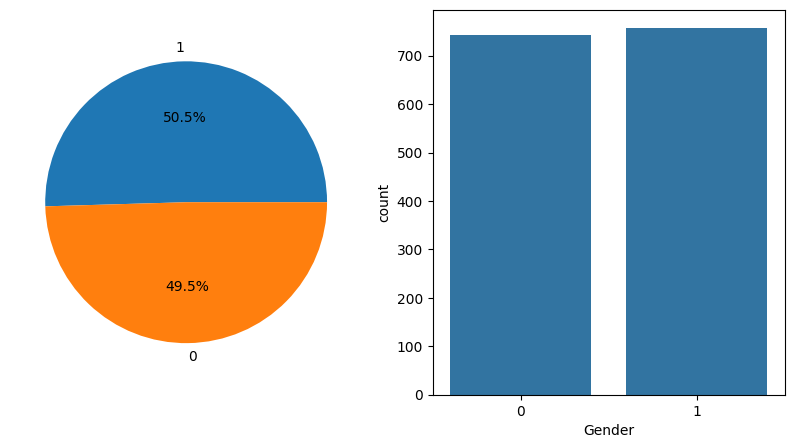

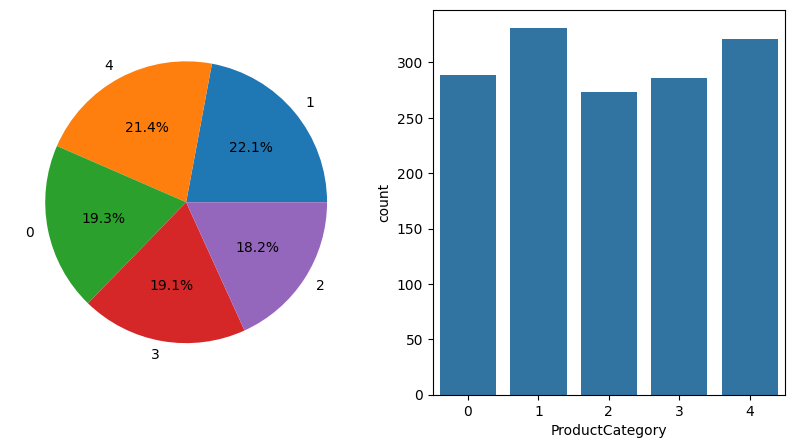

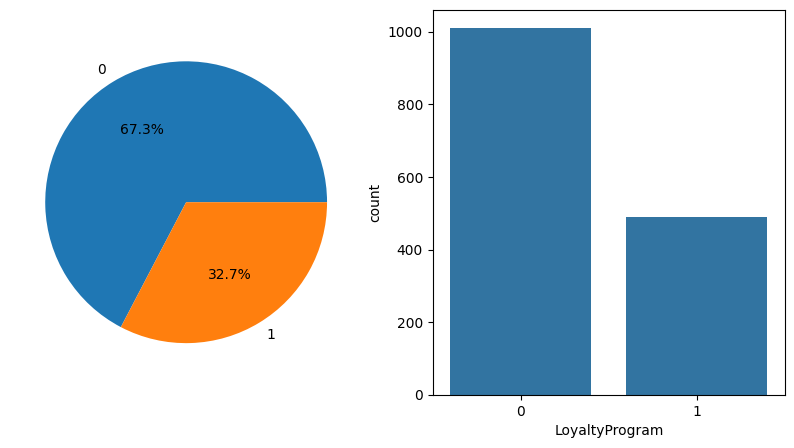

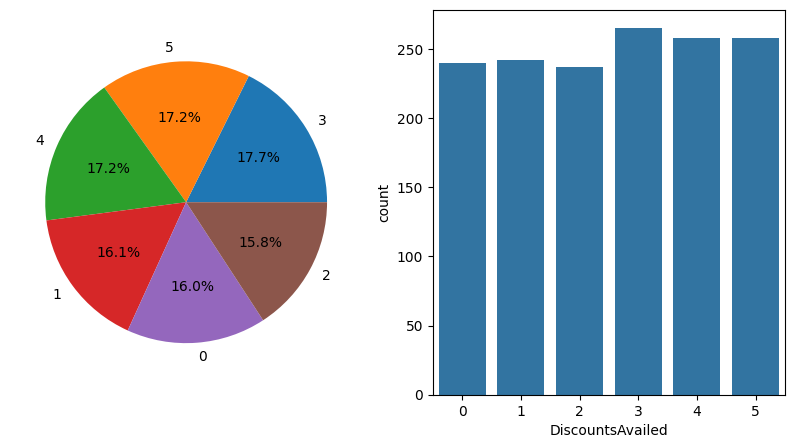

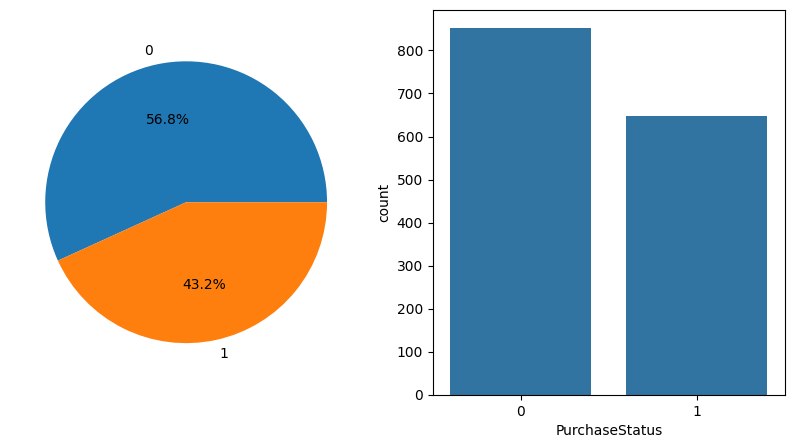

In [ ]:
catergorical_cols = df[['Gender', 'ProductCategory', 'LoyaltyProgram', 'DiscountsAvailed', 'PurchaseStatus']]

for col in catergorical_cols:
    #create subplots
    plt.figure(figsize=(10,5))
    #create pie chart
    plt.subplot(1,2,1)
    plt.pie(df[col].value_counts(), labels=df[col].value_counts().index, autopct='%1.1f%%')
    #create bar chart
    plt.subplot(1,2,2)
    sns.countplot(data=df, x=col)
    plt.show()

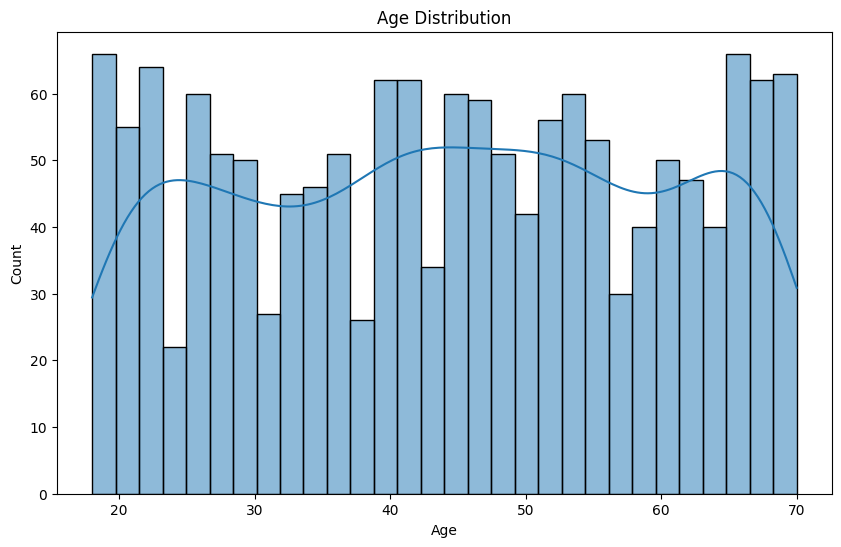

In [ ]:
# Age distribution
plt.figure(figsize=(10,6))
sns.histplot(df['Age'], bins=30, kde=True)
plt.title('Age Distribution')
plt.show()


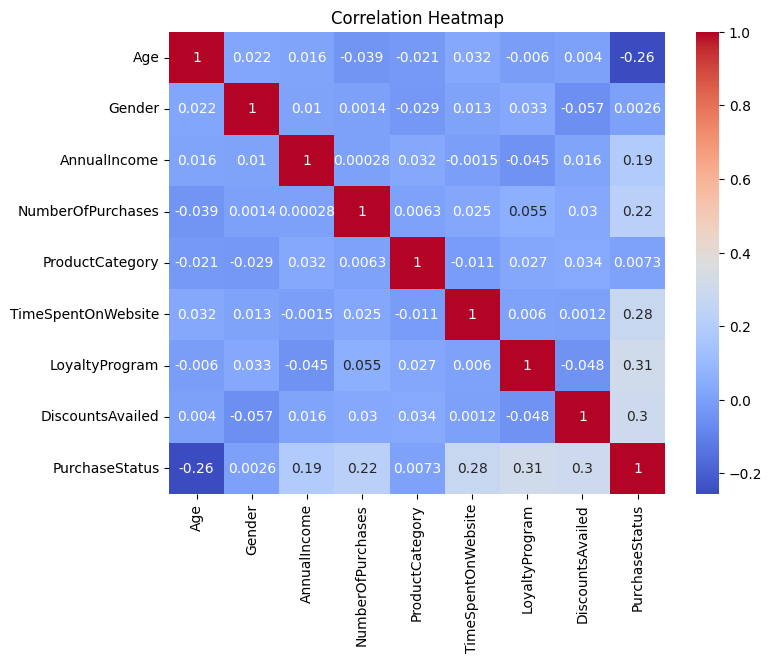

In [ ]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
X = df.drop('PurchaseStatus', axis=1)
y = df['PurchaseStatus']


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Decision Tree Classifier
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(x_train, y_train)
y_pred_dt = dt_model.predict(x_test)

In [ ]:
# Decision Tree Evaluation
accuracy_dt = accuracy_score(y_test, y_pred_dt)
precision_dt = precision_score(y_test, y_pred_dt)
recall_dt = recall_score(y_test, y_pred_dt)
f1_dt = f1_score(y_test, y_pred_dt)
cm_dt = confusion_matrix(y_test, y_pred_dt)

Decision Tree Classifier:
 Accuracy: 0.8966666666666666
 Precision: 0.9145299145299145
 Recall: 0.8359375
 F1 Score: 0.8734693877551021


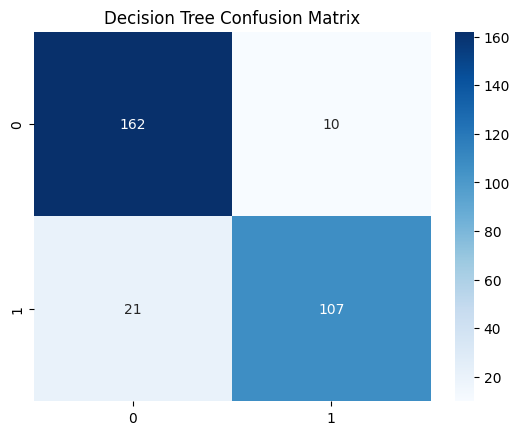

In [ ]:
print(f'Decision Tree Classifier:\n Accuracy: {accuracy_dt}\n Precision: {precision_dt}\n Recall: {recall_dt}\n F1 Score: {f1_dt}')
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Blues')
plt.title('Decision Tree Confusion Matrix')
plt.show()

Random Forest:
 Accuracy: 0.9533333333333334
 Precision: 0.9913793103448276
 Recall: 0.8984375
 F1 Score: 0.9426229508196722


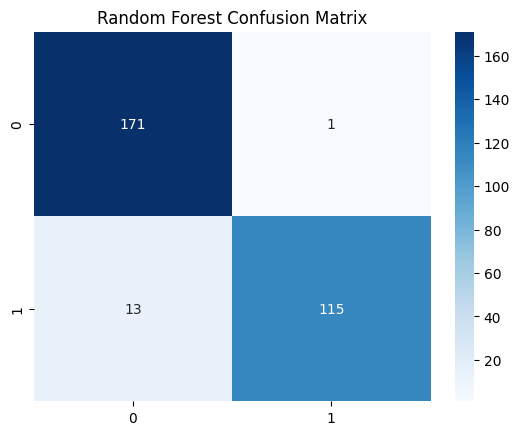

In [ ]:
# Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(x_train, y_train)
y_pred_rf = rf_model.predict(x_test)
# Random Forest Evaluation
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)
cm_rf = confusion_matrix(y_test, y_pred_rf)
print(f'Random Forest:\n Accuracy: {accuracy_rf}\n Precision: {precision_rf}\n Recall: {recall_rf}\n F1 Score: {f1_rf}')
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues')
plt.title('Random Forest Confusion Matrix')
plt.show()